## Several tests of different gravity models for verification:

>### Teste 01: Modelo da haste fina: Neste teste verifica-se a implementacao da componente vertical da atração gravitacional produzida por uma haste fina com inclinação e seção vertical assumidas pelo usuario.

### Colocar a equação aqui:



In [1]:
# import das bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from numpy import fft
#exec()

In [2]:
from modules.gravity2D import g_rod,g_prism,g_sphere,g_finit_sheet,g_semifin_sheet
from modules.auxiliar  import linemasses
from modules.plots import draw_rectangle,draw_finite_sheet,draw_infinite_sheet

In [3]:
# definicao das posicoes de observacao:
xmin  = -10.0
xmax  = +10.0
ndata = 300
x = np.linspace(xmin, xmax, ndata, endpoint=False )
z = np.zeros(len(x))

In [4]:
# criacao da linha de massas:

x1 = (-1.7171572875253809 - 2.0)/2.0
z1 = (1.782842712474619 + 1.5)/2.0
p2 = (x1, z1)

x2 = (-6.242640687119285  -5.959797974644665)/2.0
z2 = (5.742640687119286 + 6.025483399593904)/2.0
p1 = (x2, z2)

theta = np.arctan2( (p2[1] - p1[1]), (p2[0] - p1[0]) )

nmassas = 300
xs,zs = linemasses(p1,p2,nmassas)

In [5]:
# Definindo a massa da haste sintetica:
m = np.zeros( nmassas ) + 1000.0
gs = g_sphere(x,z,[xs,zs,m],component='z')

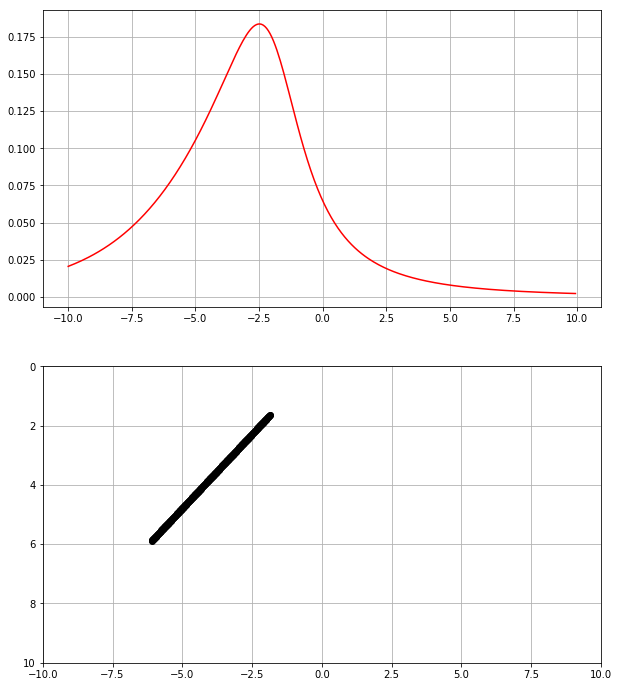

In [6]:
plt.figure(figsize=(10,12), facecolor='w')
plt.subplot(211)
plt.plot(x,gs,'-r')
plt.grid()
#########################################
plt.subplot(212)
plt.plot(xs,zs,'o-k')
plt.xlim(xmin,xmax)
plt.ylim(0, 10)
plt.grid()
plt.gca().invert_yaxis()
plt.show()

In [7]:
# [x, z, dens, dip, length, thickness]
f_sheet = [-2.0, 2.50, 2670.0, 45.0, 3.0, 0.1]
gf = g_finit_sheet(x,z,f_sheet)

In [8]:
xsf,zsf = draw_finite_sheet(sheet=f_sheet,draw=False)
print (xsf, zsf)

[-2.0, 0.12132034355964283, 0.19203102167829766, -1.9292893218813452, -2.0] [2.5, 4.621320343559642, 4.550609665440987, 2.4292893218813454, 2.5]


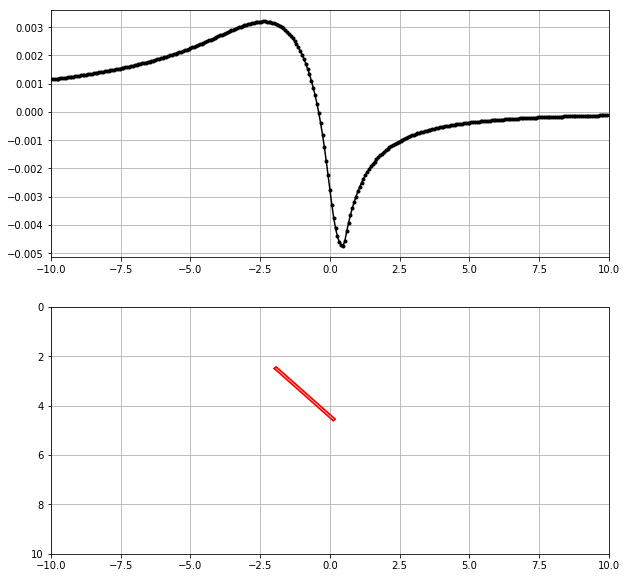

In [9]:
plt.figure(figsize=(10,10),facecolor='w')
plt.subplot(211)
plt.plot(x,gf,'.-k')
plt.xlim(xmin,xmax)
plt.grid()

plt.subplot(212)
plt.plot(xsf,zsf,'r')
plt.fill(xsf,zsf, color='r', alpha=0.4)
plt.xlim(xmin,xmax)
plt.ylim(0, 10)
plt.grid()
plt.gca().invert_yaxis()

plt.show()

In [10]:
# [x, z, rho, thickness]
isheet = [-3.0, 2.0, 2670.0, 0.5]
gi = g_semifin_sheet(x,z,isheet)

In [11]:
xsi,zsi = draw_infinite_sheet(sheet=isheet,xmax=xmax, draw=False)

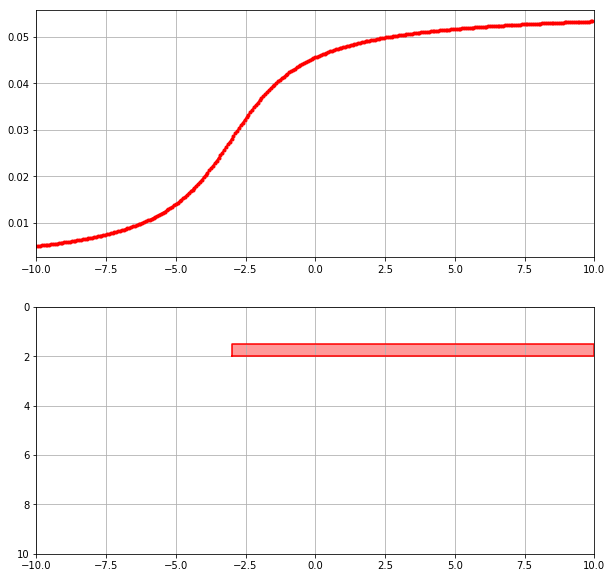

In [12]:
plt.figure(figsize=(10,10),facecolor='w')
plt.subplot(211)
plt.plot(x,gi,'.-r')
plt.xlim(xmin,xmax)
plt.grid()

plt.subplot(212)
plt.plot(xsi,zsi,'r')
plt.fill(xsi,zsi, color='r', alpha=0.4)
plt.xlim(xmin,xmax)
plt.ylim(0, 10)
plt.grid()
plt.gca().invert_yaxis()

plt.show()

## TODO:<br>
> ### - ENCONTRAR O BUG NO PLOT DA FOLHA FINITA (AINDA HÁ LIMITAÇÕES NA FOLHA FINITA - A VERIFICAR); <br>
> ### - TRANSFORMAR NUMA 'FUNCTION' DENTRO DE UM MODULO ESPECIFICADO (OK); <br>
> ### - EXTENDER PARA A FOLHA INFINITA (OK);
# FEITO!! :D

In [ ]:
# Teste da funcao g_prism:

In [13]:
prism = [2.5, 3.0, 5.0, 3000.0, 4.0]
gp = g_prism(x,z, prism)
xp, zp = draw_rectangle(prism, style='-k', linewidth=1, fill='red', alpha=0.6)

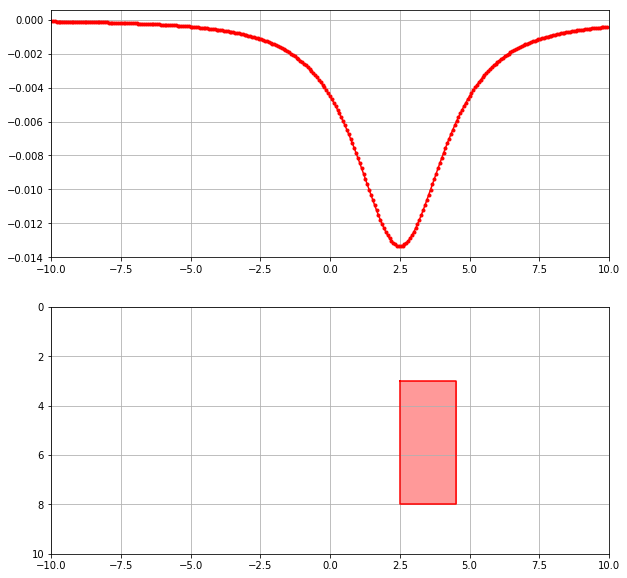

In [14]:
plt.figure(figsize=(10,10),facecolor='w')
plt.subplot(211)
plt.plot(x,gp,'.-r')
plt.xlim(xmin,xmax)
plt.grid()

plt.subplot(212)
plt.plot(xp,zp,'r')
plt.fill(xp,zp, color='r', alpha=0.4)
plt.xlim(xmin,xmax)
plt.ylim(0, 10)
plt.grid()
plt.gca().invert_yaxis()

plt.show()

## VERIFICACOES PARA OS PROXIMOS CAPITULOS:
> 1) PROFUNDIDADE POSITIVA OU NEGATIVA PARA BAIXO???? <br>
> 2) VERIFICAR AS RELAÇOES TRIGONOMÉTRICAS ENVOLVIDAS; <br>
> 3) USAR A HASTE NUMERICA PARA VALIDAR OS MODELOS DUVIDOSOS; <br>
> 4) OLHAR MAIS REFERENCIAS SOBRE O TEMA; <br>